[View in Colaboratory](https://colab.research.google.com/github/KUNAL1612/What-is-Cooking-Kaggle/blob/master/cooking.ipynb)

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving sample_submission.csv to sample_submission.csv
Saving test.json to test.json
Saving train.json to train.json
User uploaded file "sample_submission.csv" with length 137045 bytes
User uploaded file "test.json" with length 2844086 bytes
User uploaded file "train.json" with length 12415067 bytes


In [0]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.metrics import f1_score

In [0]:
data=pd.read_json('train.json')

In [4]:
data.head()

cuisine     id                                        ingredients
0        greek  10259  [romaine lettuce, black olives, grape tomatoes...
1  southern_us  25693  [plain flour, ground pepper, salt, tomatoes, g...
2     filipino  20130  [eggs, pepper, salt, mayonaise, cooking oil, g...
3       indian  22213                [water, vegetable oil, wheat, salt]
4       indian  13162  [black pepper, shallots, cornflour, cayenne pe...

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39774 entries, 0 to 39773
Data columns (total 3 columns):
cuisine        39774 non-null object
id             39774 non-null int64
ingredients    39774 non-null object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


<Container object of 20 artists>

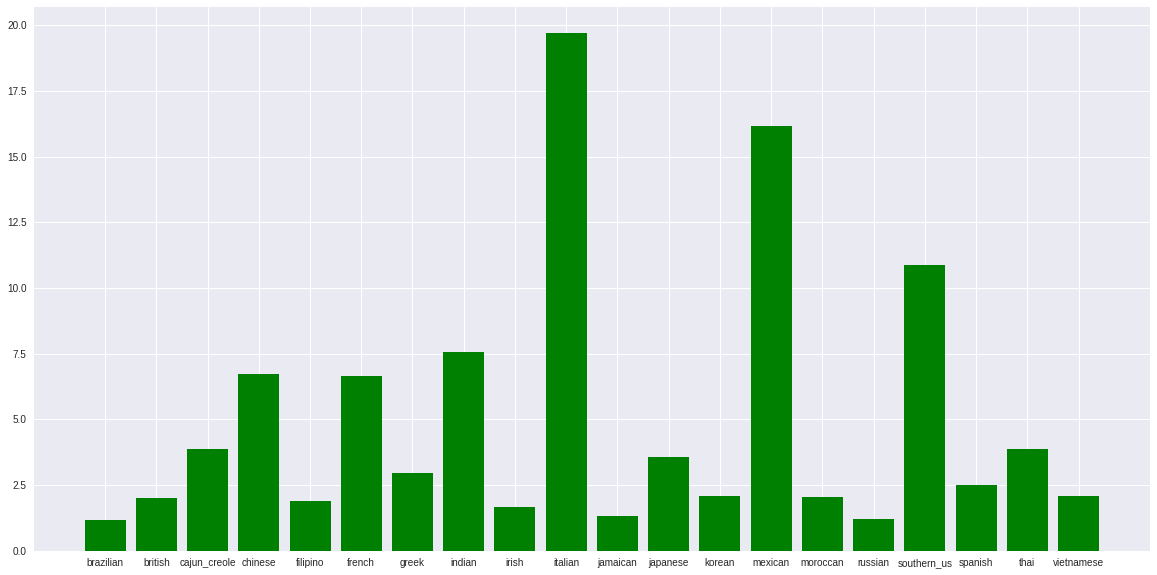

In [6]:
counts=data['cuisine'].value_counts()
counts=counts*100/39774
plt.figure(figsize=(20,10))
plt.bar(counts.index,counts,color='green')


In [0]:
n=6714 #no of different ingredients 

In [0]:
ingredients=Counter([i for sublist in data.ingredients for i in sublist])

In [0]:
ingredients_df = pd.DataFrame.from_dict(ingredients, orient='index').reset_index()

In [10]:
ingredients_df=ingredients_df.rename(columns={'index':'ingredient', 0:'count'})
ingredients_df

ingredient  count
0                                       romaine lettuce    270
1                                          black olives    229
2                                        grape tomatoes    228
3                                                garlic   7380
4                                                pepper   4438
5                                          purple onion   1896
6                                             seasoning    137
7                                        garbanzo beans    148
8                                  feta cheese crumbles    358
9                                           plain flour    154
10                                        ground pepper    385
11                                                 salt  18049
12                                             tomatoes   3058
13                                  ground black pepper   4785
14                                                thyme    361
15                                                 eggs   3388
16                                       green tomatoes    108
17                                     yellow corn meal    341
18                                                 milk   2263
19                                        vegetable oil   4385
20                                            mayonaise    781
21                                          cooking oil    483
22                                        green chilies    768
23                              grilled chicken breasts      5
24                                        garlic powder   1442
25                                         yellow onion   1184
26                                            soy sauce   3296
27                                               butter   4848
28                                       chicken livers     65
29                                                water   7457
...                                                 ...    ...
6684                                         puff paste      1
6685                                 Barilla Plus Pasta      1
6686                                turkey giblet stock      1
6687                                light chicken stock      1
6688                                         conchiglie      1
6689                 2% milk shredded mozzarella cheese      1
6690                                 Makers Mark Whisky      1
6691                  knorr pasta side   cheesi cheddar      1
6692                               whole grain baguette      1
6693                                 reduced sodium ham      1
6694                          whole wheat peasant bread      1
6695                              ranch-style seasoning      1
6696                                             ketjap      1
6697                         chocolate flavored liqueur      1
6698                       rotini pasta, cook and drain      1
6699                                               game      1
6700                                             tongue      1
6701                                              Daiya      1
6702                                          curry mix      1
6703            Kraft Slim Cut Mozzarella Cheese Slices      1
6704                           Oscar Mayer Cotto Salami      1
6705                                   Challenge Butter      1
6706                                       orange glaze      1
6707                    cholesterol free egg substitute      1
6708                                      ciabatta loaf      1
6709         Lipton® Iced Tea Brew Family Size Tea Bags      1
6710  Hidden Valley® Greek Yogurt Original Ranch® Di...      1
6711                                          lop chong      1
6712                          tomato garlic pasta sauce      1
6713                            crushed cheese crackers      1

[6714 rows x 2 columns]

In [0]:
ingredients_df=ingredients_df.sort_values( by='count',ascending=False).reset_index()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


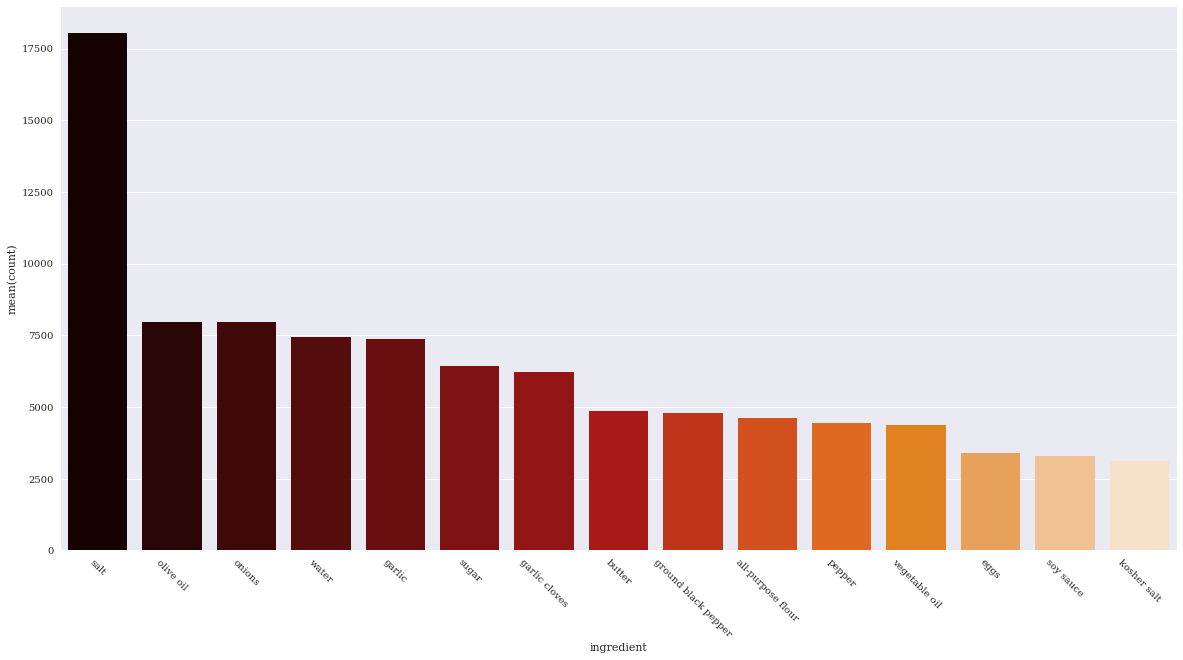

In [12]:
#top 15 most used ingredients
ing=ingredients_df[:15]
plt.figure(figsize=(20,10))
plt.rc('font', family='serif')
sns.barplot(ing['ingredient'],ing['count'],palette='gist_heat')
plt.xticks(rotation=-45)
plt.show()

In [0]:
#using tfidf. Higher the tfidf score, rarer the term

tfidf=TfidfVectorizer(binary=True)


In [0]:
#preprocessing data
#at first we load the json's


with open('train.json') as f:
  train=json.load(f)
with open('test.json') as f:
  test=json.load(f)
  
  
#we split train into train and cv set with 80/20 ratio
split=train_test_split(train,test_size=0.2)
train_data=split[0]
cv_data=split[1]
#now we get the y values for train and cv
y_train=[doc['cuisine'] for doc in train_data]
y_cv=[doc['cuisine'] for doc in cv_data]
#y_test=[doc['cuisine'] for doc in test]///No y_test for X_test. y_test is submission



#extracting all ingredients and putting them in a list. Later we will convert this to a sparse matrix  
train_ingredients=[" ".join(item['ingredients']).lower() for item in train_data]
cv_ingredients=[" ".join(item['ingredients']).lower() for item in cv_data]
test_ingredients=[" ".join(item['ingredients']).lower() for item in test]









In [0]:
#using label encoder only on training set
l=LabelEncoder()
y_train=l.fit_transform(y_train)




In [0]:
#now we use tfidf fit to X_train and then transform X_cv and X_test with it.
#This makes for smoother predictions
X_train=tfidf.fit_transform(train_ingredients)
X_cv=tfidf.transform(cv_ingredients)
X_test=tfidf.transform(test_ingredients)

In [49]:
#decision tree
d=DecisionTreeClassifier(max_depth=20)
model_tree=OneVsRestClassifier(d,n_jobs=-1)
model_tree.fit(X_train,y_train)




OneVsRestClassifier(estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          n_jobs=-1)

In [50]:
#predictions from decision tree

y_pred=model_tree.predict(X_cv)
y_pred=l.inverse_transform(y_pred)
print(y_pred)

['italian' 'brazilian' 'italian' ... 'southern_us' 'italian' 'southern_us']


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [53]:
#accuracy for decision tree

print(accuracy_score(y_cv,y_pred))

print(f1_score(y_cv,y_pred,average='weighted'))

0.621370207416719
0.6173792767940228


In [72]:
#Let us try using a perceptron
p=Perceptron(penalty='l2',alpha=0.00001)
model_perceptron=OneVsRestClassifier(p,n_jobs=-1)
model_perceptron.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stoc

OneVsRestClassifier(estimator=Perceptron(alpha=1e-05, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=None, n_iter=None, n_jobs=1, penalty='l2', random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False),
          n_jobs=-1)

In [73]:

y_pred=model_perceptron.predict(X_cv)
y_pred=l.inverse_transform(y_pred)
print(y_pred)

['japanese' 'brazilian' 'mexican' ... 'southern_us' 'cajun_creole'
 'southern_us']


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [74]:
#perceptron accuracy
print(accuracy_score(y_cv,y_pred))

0.7112507856693904


In [78]:
#kNN
clf=KNeighborsClassifier(n_neighbors=8)
model_knn=OneVsRestClassifier(clf,n_jobs=-1)
model_knn.fit(X_train,y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform'),
          n_jobs=-1)

In [79]:
y_pred=model_knn.predict(X_cv)
y_pred=l.inverse_transform(y_pred)
print(y_pred)

['indian' 'brazilian' 'mexican' ... 'mexican' 'italian' 'southern_us']


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [80]:
#kNN accuracy
print(accuracy_score(y_cv,y_pred))

0.7444374607165305


In [81]:
#Support Vector Classifier
s = SVC(C=10, gamma=1.2, coef0=1, tol=0.001, decision_function_shape=None,kernel='rbf')
model_svc = OneVsRestClassifier(s, n_jobs=1)
model_svc.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC(C=10, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape=None, degree=3, gamma=1.2, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          n_jobs=1)

In [82]:
y_pred=model_svc.predict(X_cv)
y_pred=l.inverse_transform(y_pred)
print(y_pred)

['indian' 'brazilian' 'mexican' ... 'southern_us' 'cajun_creole'
 'southern_us']


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [83]:
#SVM accuracy

print(accuracy_score(y_cv,y_pred))

0.8164676304211188


In [39]:
#Random Forest
rf=RandomForestClassifier(n_estimators=60,max_depth=60)
model_rf=OneVsRestClassifier(rf,n_jobs=-1)
model_rf.fit(X_train,y_train)

OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=60, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          n_jobs=-1)

In [40]:
y_pred=model_rf.predict(X_cv)
y_pred=l.inverse_transform(y_pred)
print(y_pred)

['indian' 'brazilian' 'mexican' ... 'southern_us' 'italian' 'southern_us']


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [41]:
#rf accuracy with n_estimators at 100 and max_depth at 15:0.694
#rf accuracy with n_estimators at 100 and max_depth at 20:0.719
#rf accuracy with n_estimators at 50 and max_depth at 50:0.757
#rf accuracy with n_estimators at 60 and max_depth at 60:0.765


print(accuracy_score(y_cv,y_pred))

0.7651791326209931
